In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
#dataset load
drebin_all = pd.read_csv('drebin-215-dataset-5560malware-9476-benign.csv', 
                         usecols= [*range(0, 6),*range(7, 13),*range(14,19)
                                  ,21,23,24,*range(28,38),41,43,46,48,51,54,
                                   57,58,59,62,64,68,70,78,80,*range(83,87),
                                   *range(92, 95),98,101,102,104,109,123,128,
                                   140,142,145,147,148,152,155,156,158,167,
                                   171,172,180,190,215])

/home/galib/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
drebin_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15036 entries, 0 to 15035
Data columns (total 74 columns):
transact                                       15036 non-null int64
onServiceConnected                             15036 non-null int64
bindService                                    15036 non-null int64
attachInterface                                15036 non-null int64
ServiceConnection                              15036 non-null int64
android.os.Binder                              15036 non-null int64
Ljava.lang.Class.getCanonicalName              15036 non-null int64
Ljava.lang.Class.getMethods                    15036 non-null int64
Ljava.lang.Class.cast                          15036 non-null int64
Ljava.net.URLDecoder                           15036 non-null int64
android.content.pm.Signature                   15036 non-null int64
android.telephony.SmsManager                   15036 non-null int64
getBinder                                      15036 non-null int64
ClassLo

In [4]:
X = drebin_all.iloc[0:,0:73]  #independent columns
y = drebin_all.iloc[0:,-1]
X["TelephonyManager.getSimCountryIso"] = pd.to_numeric(X['TelephonyManager.getSimCountryIso'], errors='coerce').fillna(0).astype(int)

In [5]:
y.dtypes

dtype('O')

In [6]:
y = y.map(dict(S=1, B=0))

In [7]:
y

0        1
1        1
2        1
3        1
4        1
        ..
15031    0
15032    0
15033    0
15034    0
15035    0
Name: class, Length: 15036, dtype: int64

## Variance 

In [9]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold()
selector.fit_transform(X)

selector.variances_

array([0.2445894 , 0.24714789, 0.24671338, 0.2424672 , 0.24696753,
       0.24982834, 0.22137341, 0.20264542, 0.21487492, 0.24163741,
       0.22930581, 0.15091489, 0.15299733, 0.24957493, 0.24998804,
       0.24681176, 0.24457961, 0.24947353, 0.10684477, 0.24529832,
       0.2210801 , 0.24926008, 0.18636427, 0.16225229, 0.24895096,
       0.24841825, 0.24385159, 0.23195163, 0.0989895 , 0.2458468 ,
       0.04233176, 0.16870902, 0.24626435, 0.19811324, 0.23549318,
       0.16537612, 0.16935246, 0.16939023, 0.02025588, 0.04553195,
       0.09976385, 0.24847591, 0.03794453, 0.18157997, 0.02683864,
       0.02507577, 0.11198152, 0.01923465, 0.07158984, 0.13964136,
       0.01763445, 0.0287823 , 0.01949017, 0.24529832, 0.04342141,
       0.04936321, 0.22820076, 0.0350559 , 0.21394649, 0.24962801,
       0.0039745 , 0.00883252, 0.02469711, 0.00535805, 0.17669433,
       0.21524786, 0.00271935, 0.00252088, 0.08019199, 0.23680771,
       0.01195777, 0.08718915, 0.00099661])

## SelectKBest (Chi)

In [10]:
#apply SelectKBest class to extract top 10 best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['APIs','Score']  #naming the dataframe columns

In [11]:
featureScores

,APIs,Score
0,transact,2804.253266
1,onServiceConnected,2620.581661
2,bindService,2618.240161
3,attachInterface,2684.291951
4,ServiceConnection,2596.080380
...,...,...
68,ProcessBuilder,23.921846
69,Ljava.lang.Class.getResource,16.144886
70,defineClass,21.645784
71,findClass,18.200677


In [12]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                                 APIs        Score
0                            transact  2804.253266
3                     attachInterface  2684.291951
1                  onServiceConnected  2620.581661
2                         bindService  2618.240161
4                   ServiceConnection  2596.080380
5                   android.os.Binder  2366.032029
11       android.telephony.SmsManager  2316.527058
6   Ljava.lang.Class.getCanonicalName  2201.010196
7         Ljava.lang.Class.getMethods  2055.294607
8               Ljava.lang.Class.cast  2010.539564


## Feature Importances

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
#model_rf = RandomForestClassifier()
model.fit(X,y)
#model_rf.fit(X,y)

/home/galib/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [14]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[6.73541166e-03 7.08978324e-02 7.32114829e-02 7.74455837e-02
 2.02244595e-02 3.48851902e-02 9.36949868e-03 2.43484315e-02
 5.64833496e-03 1.49491367e-02 5.49737952e-03 1.04146132e-01
 1.62330928e-02 1.13148690e-02 2.23490571e-02 2.73568906e-02
 1.10618448e-02 8.09167617e-03 3.92923241e-03 6.01843220e-03
 2.34005793e-02 5.51324796e-03 5.46618994e-02 3.56554146e-03
 7.44207375e-03 3.99206345e-03 9.99113800e-03 9.39506022e-03
 6.78270133e-03 3.00771284e-03 2.41916840e-02 3.50433451e-02
 9.51830320e-03 1.13207951e-02 9.26751265e-03 2.00989803e-03
 4.01646069e-03 3.57169350e-03 9.00140591e-03 1.07492535e-03
 8.46524600e-03 4.86924411e-02 3.80464460e-04 6.28287208e-03
 6.89820579e-04 1.39874650e-03 6.36591987e-03 2.35518490e-04
 2.11725649e-03 9.09369883e-03 1.44129439e-03 3.25479946e-03
 2.41286499e-03 7.93056853e-03 1.59549502e-03 2.10918882e-03
 1.01977000e-02 1.71635848e-03 1.45590201e-02 1.75261411e-02
 7.46939156e-05 2.10594354e-03 9.49993620e-03 1.72256622e-04
 1.05906912e-02 1.015854

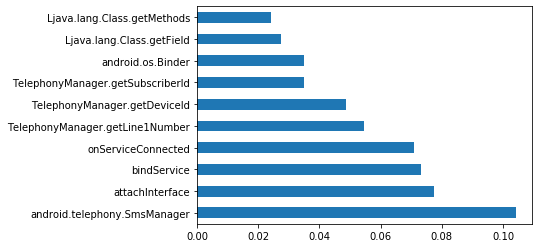

In [15]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [16]:
top_10_apis = feat_importances.nlargest(30).index
top_10_apis

Index(['android.telephony.SmsManager', 'attachInterface', 'bindService',
       'onServiceConnected', 'TelephonyManager.getLine1Number',
       'TelephonyManager.getDeviceId', 'TelephonyManager.getSubscriberId',
       'android.os.Binder', 'Ljava.lang.Class.getField',
       'Ljava.lang.Class.getMethods', 'android.telephony.gsm.SmsManager',
       'android.content.pm.PackageInfo',
       'Landroid.content.Context.registerReceiver', 'ServiceConnection',
       'TelephonyManager.getNetworkOperator', 'getBinder',
       'Ljava.net.URLDecoder', 'Ljava.lang.Class.getResource', 'Runtime.exec',
       'Ljava.lang.Object.getClass', 'ClassLoader',
       'Landroid.content.Context.unregisterReceiver', 'findClass',
       'TelephonyManager.getSimOperator', 'HttpUriRequest', 'onBind',
       'Ljava.lang.Class.getMethod', 'Runtime.getRuntime', 'SET_ALARM',
       'System.loadLibrary'],
      dtype='object')

In [17]:
top_ten_api_index = []
print('Variance of APIs:\n')
for api in top_10_apis:
    top_ten_api_index.append(X.columns.get_loc(api))
    print(X.loc[0:,api].var())
    
top_ten_api_index

Variance of APIs:

0.15092493236279453
0.24248332767573275
0.24672978621404656
0.24716432695441856
0.18637666231133215
0.24849243314772507
0.1687202460022249
0.24984495696084305
0.24682817772097976
0.20265890186358265
0.04233457925126567
0.22109480202836634
0.2500046667733593
0.2469839594816544
0.24964461304403823
0.1530075076218828
0.24165348247896182
0.23682346494338583
0.21396071665010877
0.19812642098829322
0.24959153126165015
0.24459587644786243
0.08719494452644344
0.17670608165944166
0.22821593987534078
0.21526217578866844
0.243867806721778
0.24628072760615966
0.024698754250191544
0.2319670524916211


[11,
 3,
 2,
 1,
 22,
 41,
 31,
 5,
 15,
 7,
 30,
 20,
 14,
 4,
 59,
 12,
 9,
 69,
 58,
 33,
 13,
 16,
 71,
 64,
 56,
 65,
 26,
 32,
 62,
 27]

## Correlation 

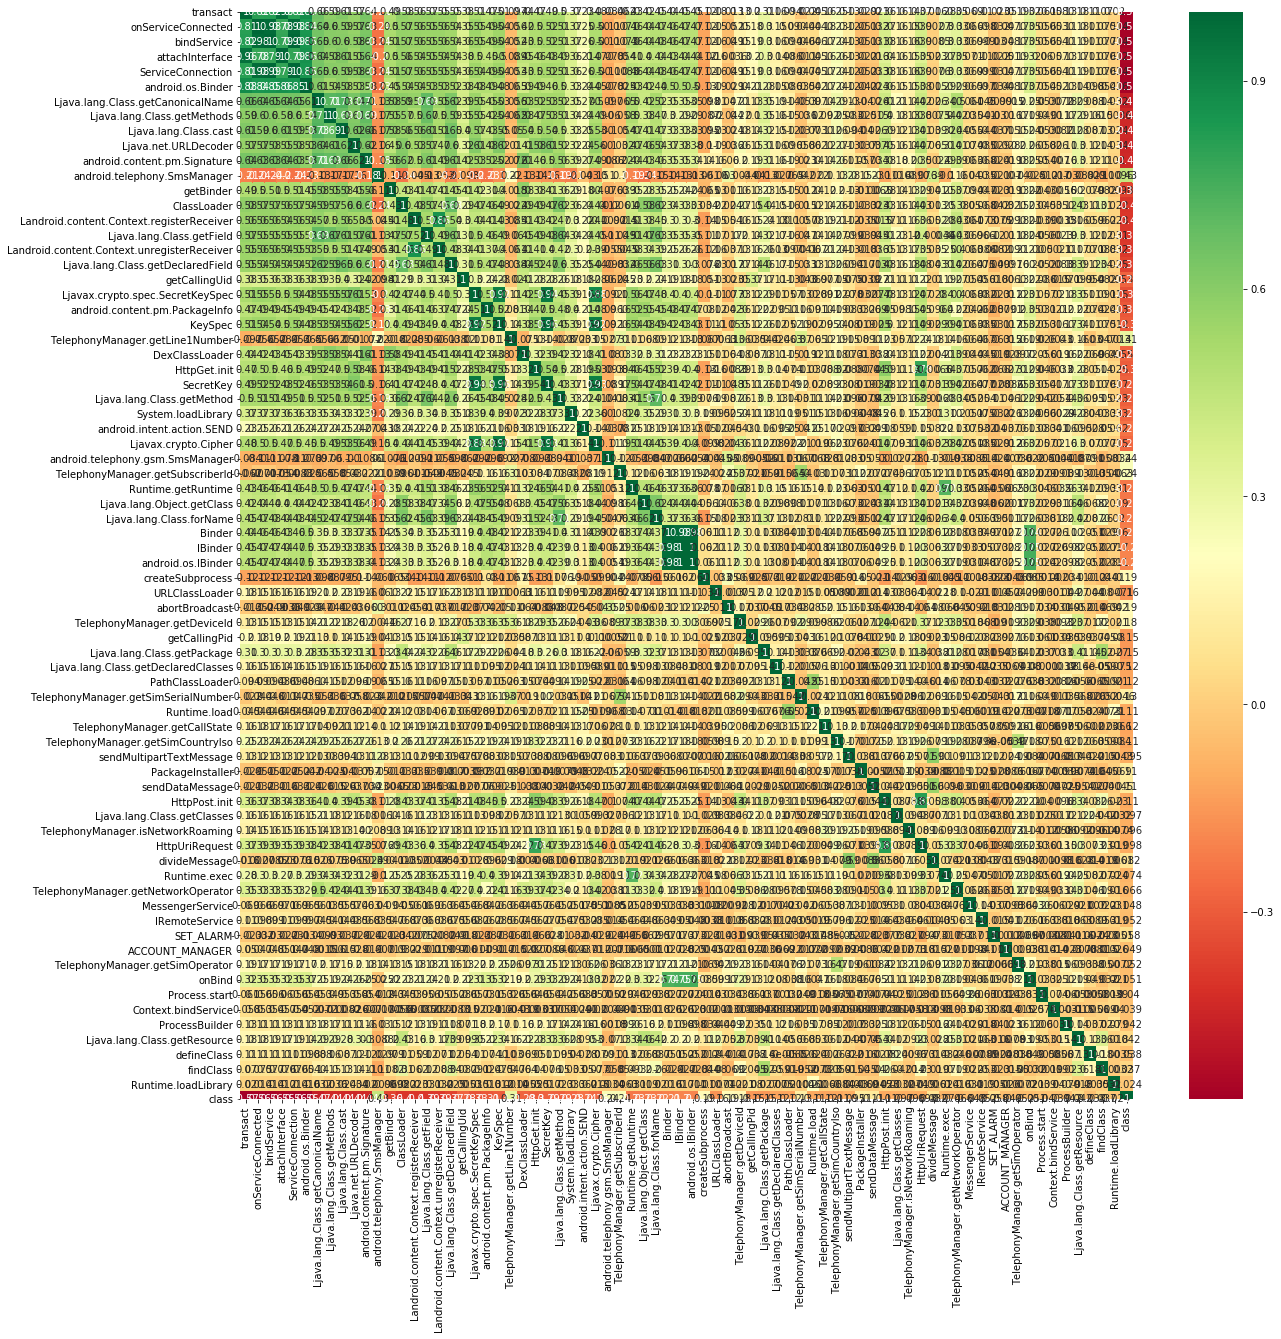

In [18]:
import seaborn as sns
#get correlations of each features in dataset
drebin_all_processed = pd.concat([X,y], axis = 1) #concatenate column
corrmat = drebin_all_processed.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(drebin_all_processed[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [23]:
cor_target = abs(corrmat["class"])
cor_target
high_correlated_features = cor_target[cor_target<0.05]
high_correlated_features

MessengerService                0.048484
ACCOUNT_MANAGER                 0.048845
Process.start                   0.040054
Context.bindService             0.038557
ProcessBuilder                  0.041765
Ljava.lang.Class.getResource    0.041789
defineClass                     0.038174
findClass                       0.036603
Runtime.loadLibrary             0.024206
Name: class, dtype: float64

## Random Forest Classifiers for all APIs

In [24]:
## Random Forest 
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)




In [26]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs=-1)
classifier.fit(X_train, y_train)

%time

CPU times: user 8 µs, sys: 1e+03 ns, total: 9 µs
Wall time: 15.3 µs


In [27]:
# Predicting  
classifications = classifier.predict(X_test)
%time

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.2 µs


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,classifications))



              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1940
           1       0.99      0.96      0.97      1068

    accuracy                           0.98      3008
   macro avg       0.98      0.98      0.98      3008
weighted avg       0.98      0.98      0.98      3008



In [29]:
classifications


array([0, 0, 0, ..., 1, 0, 1])

## Random Forest Classifiers for top 10 APIs

In [30]:
X_top_ten = X.iloc[0:, top_ten_api_index]

In [31]:
## Random Forest 
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_top_ten, y, test_size = 0.2, random_state = 0)

%time


CPU times: user 7 µs, sys: 1e+03 ns, total: 8 µs
Wall time: 14.5 µs


In [33]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs=-1)
classifier.fit(X_train, y_train)

%time

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


In [34]:
# Predicting  
classifications = classifier.predict(X_test)

%time

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,classifications))



              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1940
           1       0.98      0.94      0.96      1068

    accuracy                           0.97      3008
   macro avg       0.97      0.97      0.97      3008
weighted avg       0.97      0.97      0.97      3008



In [36]:
classifications


array([0, 0, 0, ..., 1, 0, 1])